# 스케일링(Scaling)

* 다음의 내용을 설명합니다.
    * 표준화와 정규화 차이
    * 스케일링 한 데이터와 안한 데이터 knn 성능 차이

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

### (2) 데이터로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|----|----|
|	medv	|	타운별 집값(중위수), **Target**	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 전처리

In [3]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2
                                                  , random_state = 20)

## 3.스케일링

### (1) 정규화(Normalization)

In [4]:
scaler = MinMaxScaler()
x_train_n = scaler.fit_transform(x_train)
x_val_n = scaler.transform(x_val)

# 데이터프레임으로 변환하는 이유는 .describe() 메소드를 사용하기 위함 입니다.
x_train_n = pd.DataFrame(x_train_n, columns = list(x_train))
x_val_n = pd.DataFrame(x_val_n, columns = list(x_val))

### (2) 표준화(Standardization)

In [5]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

x_train_s = pd.DataFrame(x_train_s, columns = list(x_train))
x_val_s = pd.DataFrame(x_val_s, columns = list(x_val))

## 4.표준화 vs 정규화

### (1) 원본과 스케일링 된 데이터 비교하기
* 위 결과에서 특별히 crim, tax, nox만 살펴보겠습니다.

In [6]:
features = ['crim', 'tax', 'nox']

* 원본 데이터

In [7]:
# 원본데이터에서 crim, tax, nox만 뽑아서 기초통계량을 살펴보겠습니다.
# .T는 transpose 메소드로, 행과 열의 위치를 바꾸는 일을 합니다. 
x_train[features].describe().T

,count,mean,std,min,25%,50%,75%,max
crim,404.0,3.605117,8.141616,0.00632,0.083827,0.253715,3.716458,73.5341
tax,404.0,412.240099,169.295356,187.00000,279.000000,345.000000,666.000000,711.0000
nox,404.0,0.552932,0.115587,0.38500,0.447750,0.538000,0.624000,0.8710


* 정규화 데이터 기초통계량

세 변수의 min은 0, max은 1로 변환되었습니다.

In [8]:
x_train_n[features].describe().T

,count,mean,std,min,25%,50%,75%,max
crim,404.0,0.048945,0.110728,0.0,0.001054,0.003365,0.050459,1.0
tax,404.0,0.429848,0.323083,0.0,0.175573,0.301527,0.914122,1.0
nox,404.0,0.345539,0.237832,0.0,0.129115,0.314815,0.491770,1.0


* 표준화 데이터 기초통계량

평균은 거의 0, 표준편차는 거의 1 입니다.

In [9]:
x_train_s[features].describe().T

,count,mean,std,min,25%,50%,75%,max
crim,404.0,-2.198461e-17,1.00124,-0.442573,-0.433041,-0.412149,0.013692,8.599729
tax,404.0,9.673230e-17,1.00124,-1.332106,-0.788003,-0.397669,1.500777,1.766914
nox,404.0,-2.792046e-16,1.00124,-1.454671,-0.911115,-0.129346,0.615607,2.755184


* 스케일링은 분포의 모양 자체를 바꾸지는 않습니다.

* crim

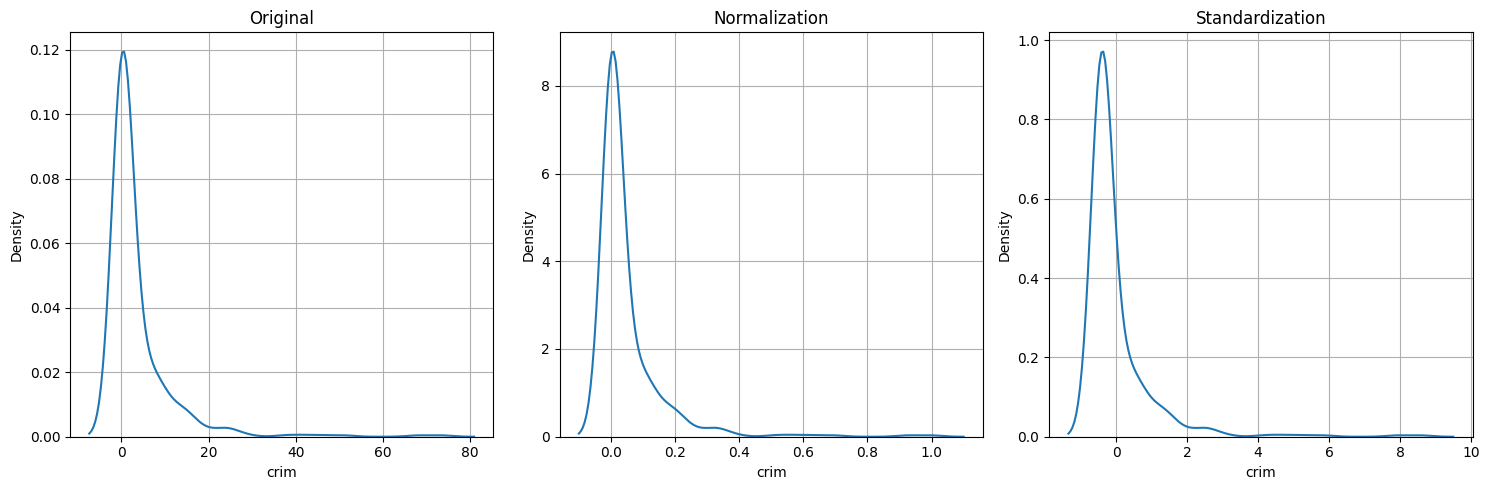

In [10]:
var = 'crim'

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.title('Original')
sns.kdeplot(x_train[var])
plt.grid()

plt.subplot(1,3,2)
plt.title('Normalization')
sns.kdeplot(x_train_n[var])
plt.grid()

plt.subplot(1,3,3)
plt.title('Standardization')
sns.kdeplot(x_train_s[var])
plt.grid()

plt.tight_layout()
plt.show()

* tax

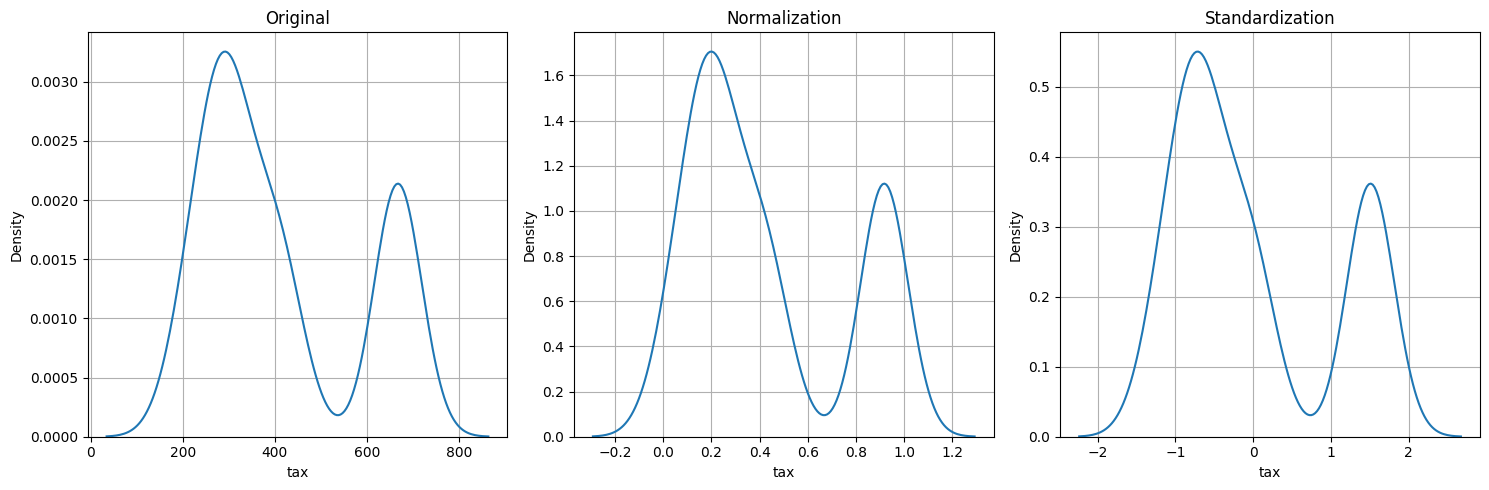

In [11]:
var = 'tax'

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.title('Original')
sns.kdeplot(x_train[var])
plt.grid()

plt.subplot(1,3,2)
plt.title('Normalization')
sns.kdeplot(x_train_n[var])
plt.grid()

plt.subplot(1,3,3)
plt.title('Standardization')
sns.kdeplot(x_train_s[var])
plt.grid()

plt.tight_layout()
plt.show()

* nox

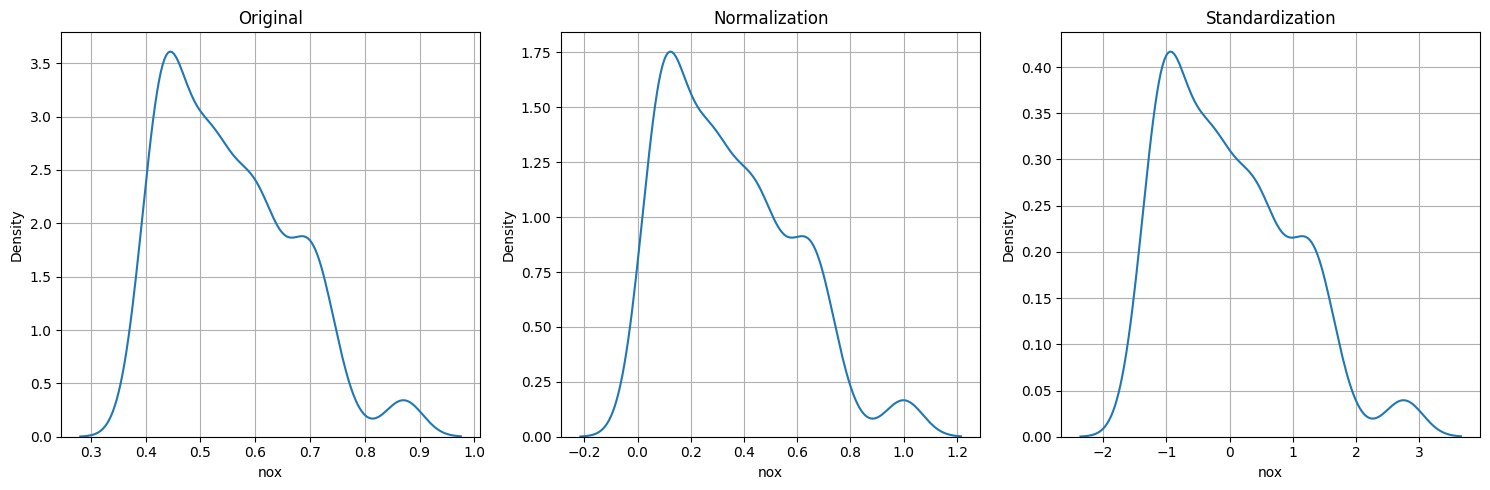

In [12]:
var = 'nox'

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.title('Original')
sns.kdeplot(x_train[var])
plt.grid()

plt.subplot(1,3,2)
plt.title('Normalization')
sns.kdeplot(x_train_n[var])
plt.grid()

plt.subplot(1,3,3)
plt.title('Standardization')
sns.kdeplot(x_train_s[var])
plt.grid()

plt.tight_layout()
plt.show()


### (2) 모델링 성능 비교

* 원본, 정규화, 표준화 데이터셋에 대해서
* k값을 증가시켜가며 모델생성, 예측, MAE 평가를 수행한 후
* 이를 그래프로 그려 보았습니다.

In [13]:
k_vals = list(range(1,50))
r1, r2, r3 = [],[],[]

for k in k_vals : 
    # 모델선언
    m1 = KNeighborsRegressor(n_neighbors = k)
    m2 = KNeighborsRegressor(n_neighbors = k)
    m3 = KNeighborsRegressor(n_neighbors = k)

    # 학습(각 데이터로 학습하기)
    m1.fit(x_train, y_train)
    m2.fit(x_train_n, y_train)
    m3.fit(x_train_s, y_train)

    # 예측
    p1 = m1.predict(x_val)
    p2 = m2.predict(x_val_n)
    p3 = m3.predict(x_val_s)

    # 성능평가
    r1.append(mean_absolute_error(y_val, p1))
    r2.append(mean_absolute_error(y_val, p2))
    r3.append(mean_absolute_error(y_val, p3))


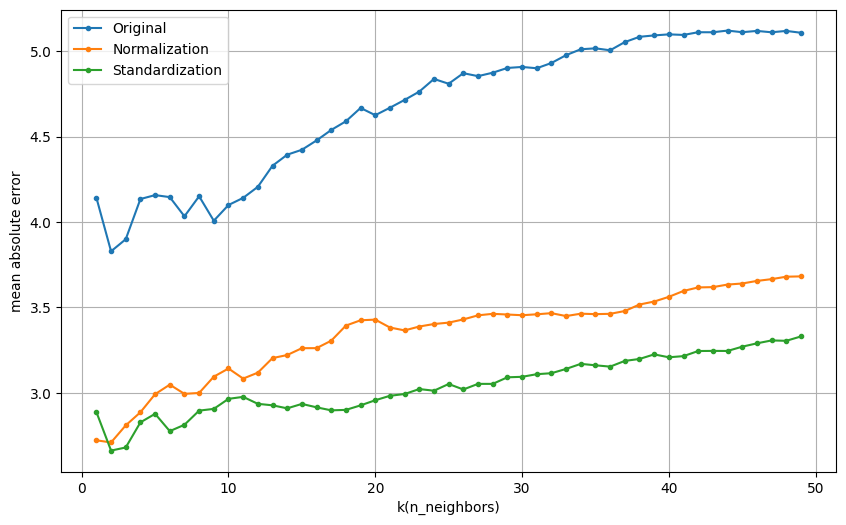

In [14]:
plt.figure(figsize = (10,6))
plt.plot(k_vals, r1, marker = '.', label = 'Original')
plt.plot(k_vals, r2, marker = '.', label = 'Normalization')
plt.plot(k_vals, r3, marker = '.', label = 'Standardization')

plt.xlabel('k(n_neighbors)')
plt.ylabel('mean absolute error')
plt.grid()
plt.legend()
plt.show()

## 5.실습
* 원본데이터와 스케일링 된 두 데이터에 대해서 SVM으로 모델링을 수행하고 성능을 비교해 봅시다.
* 4 - (2) 코드와 같이
    * C 를 조금씩 조절하며 성능비교를 합시다.
        * 범위 : 0.01 ~ 10

In [ ]:
from sklearn.svm import SVR

In [ ]:
np.linspace(0.01, 10, 100)

In [ ]:
c_values = np.linspace(0.01, 10, 100)
r1, r2, r3 = [],[],[]

for c in c_values : 
    # 모델선언
    m1 = 
    m2 = 
    m3 = 

    # 학습(각 데이터로 학습하기)
    m1.fit( , )
    m2.fit( , )
    m3.fit( , )

    # 예측
    p1 = 
    p2 = 
    p3 = 

    # 성능평가
    r1.append(mean_absolute_error(y_val, p1))
    r2.append(mean_absolute_error(y_val, p2))
    r3.append(mean_absolute_error(y_val, p3))


In [ ]:
plt.figure(figsize = (10,6))
plt.plot(c_values, r1, marker = '.', label = 'Original')
plt.plot(c_values, r2, marker = '.', label = 'Normalization')
plt.plot(c_values, r3, marker = '.', label = 'Standardization')

plt.xlabel('k(n_neighbors)')
plt.ylabel('mean absolute error')
plt.grid()
plt.legend()
plt.show()